In [1]:
# Ce Notebook est pour expliquer un code simple pour une Regresssion Logistique Binaire
# L'exemple est pour predire si un email est un spam ou non

In [2]:
# Importer les librairies necessaires
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import learning_curve

In [3]:
# Lire le dataset
data = pd.read_csv('Email.csv',index_col=0)
# Afficher les 5 premiers lignes
data.head()

,label,text,label_num
605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
4685,spam,"Subject: photoshop , windows , office . cheap ...",1
2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [4]:
# Retirer les colonnes inutiles et verifier les valeurs manquantes
data.drop('label',axis=1,inplace=True)
data.isna().sum()

text         0
label_num    0
dtype: int64

In [5]:
data['label_num'].value_counts()

label_num
0    3672
1    1499
Name: count, dtype: int64

In [6]:
# On divise le dataset en X et y
X = data.drop('label_num',axis=1)
y = data['label_num']

In [7]:
# On divise le dataset en train et test
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [8]:
# Comme les valeurs sont des chaines de caracteres, on doit les transformer en valeurs numeriques
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train['text'])
X_test = vectorizer.transform(X_test['text'])

In [9]:
# On entraine le modele
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [10]:
# On predit les valeurs
y_pred = model.predict(X_test)

In [11]:
# On evalue le modele
# Le score et l'erreur
print(f'Le score est : {accuracy_score(y_test,y_pred)*100: .2f} %\n')
print('Le rapport de classification :')
print(classification_report(y_test,y_pred))
#print(f'L\'erreur est : {(1-accuracy_score(y_test,y_pred))*100: .2f} %')

Le score est :  98.07 %

Le rapport de classification :
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       742
           1       0.97      0.97      0.97       293

    accuracy                           0.98      1035
   macro avg       0.98      0.98      0.98      1035
weighted avg       0.98      0.98      0.98      1035



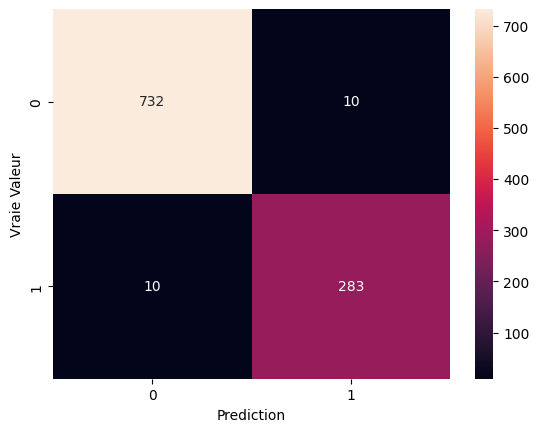

In [12]:
# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")  # fmt="d" pour afficher les valeurs numeriques
plt.xlabel('Prediction')
plt.ylabel('Vraie Valeur')
plt.show()

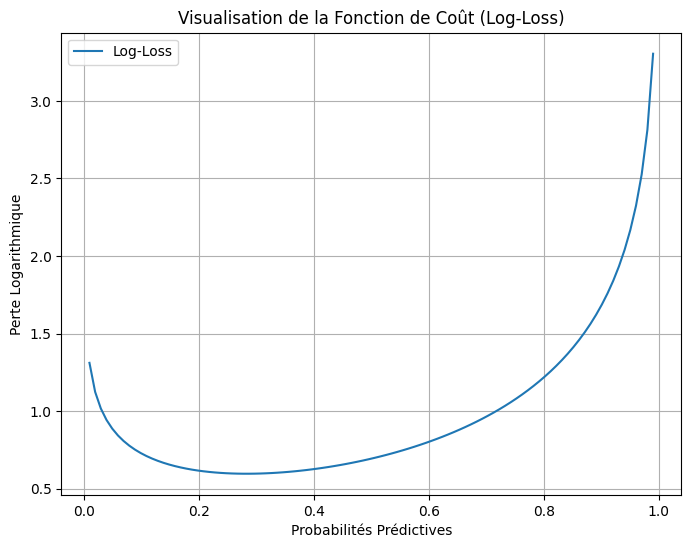

In [13]:
# Étape 1 : Calcul des probabilités
y_proba = model.predict_proba(X_test)[:, 1]  # Probabilité pour la classe positive (1)

# Étape 2 : Créer une plage de probabilités
prob_range = np.linspace(0.01, 0.99, 100)  # Probabilités entre 0.01 et 0.99

# Étape 3 : Calculer la fonction de coût
def log_loss(y_true, y_pred_prob):
    return -np.mean(y_true * np.log(y_pred_prob) + (1 - y_true) * np.log(1 - y_pred_prob))

losses = [log_loss(y_test, np.clip(prob, 0.01, 0.99)) for prob in prob_range]

# Étape 4 : Tracer la fonction de coût
plt.figure(figsize=(8, 6))
plt.plot(prob_range, losses, label="Log-Loss")
plt.title("Visualisation de la Fonction de Coût (Log-Loss)")
plt.xlabel("Probabilités Prédictives")
plt.ylabel("Perte Logarithmique")
plt.legend()
plt.grid(True)
plt.show()

L'AUC est : 1.00


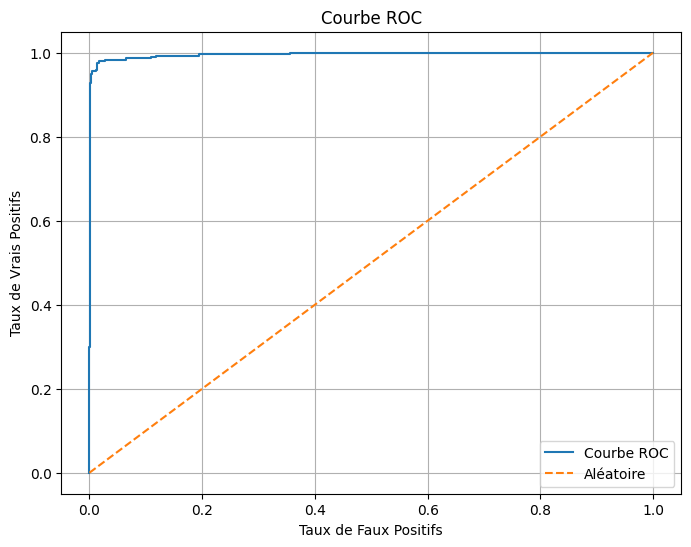

In [14]:
# Maintenant la courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

auc = roc_auc_score(y_test, y_proba)
print(f"L'AUC est : {auc:.2f}")

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label="Courbe ROC")
plt.plot([0, 1], [0, 1], linestyle="--", label="Aléatoire")
plt.title("Courbe ROC")
plt.xlabel("Taux de Faux Positifs")
plt.ylabel("Taux de Vrais Positifs")
plt.legend()
plt.grid(True)
plt.show()

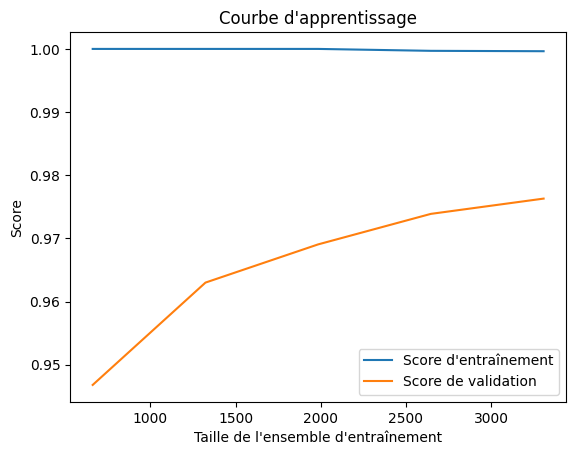

In [15]:
# Tracer la courbe d'apprentissage
n, tr_score, val_score = learning_curve(model, X_train, y_train, train_sizes=np.linspace(0.2, 1, 5), cv=5)
plt.plot(n, tr_score.mean(axis=1), label="Score d'entraînement")
plt.plot(n, val_score.mean(axis=1), label="Score de validation")
plt.title("Courbe d'apprentissage")
plt.xlabel("Taille de l'ensemble d'entraînement")
plt.ylabel("Score")
plt.legend()
plt.show()